# What to watch when you are finally ready to go foreign
## A Movie Recommendation System
Data sourced from https://developer.imdb.com/non-commercial-datasets/

#### Import Packages

In [190]:
import pandas as pd
import numpy as np
import gzip
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from langdetect import detect, LangDetectException

#### Preview Data

In [191]:
with gzip.open('title.akas.tsv.gz', 'rt') as f:
    tsv_reader = csv.reader(f, delimiter="\t")
    number_of_lines = 10
    for i in range(number_of_lines):
        row = next(tsv_reader)
        print(i, row)

0 ['titleId', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle']
1 ['tt0000001', '1', 'Карменсіта', 'UA', '\\N', 'imdbDisplay', '\\N', '0']
2 ['tt0000001', '2', 'Carmencita', 'DE', '\\N', '\\N', 'literal title', '0']
3 ['tt0000001', '3', 'Carmencita - spanyol tánc', 'HU', '\\N', 'imdbDisplay', '\\N', '0']
4 ['tt0000001', '4', 'Καρμενσίτα', 'GR', '\\N', 'imdbDisplay', '\\N', '0']
5 ['tt0000001', '5', 'Карменсита', 'RU', '\\N', 'imdbDisplay', '\\N', '0']
6 ['tt0000001', '6', 'Carmencita', 'US', '\\N', 'imdbDisplay', '\\N', '0']
7 ['tt0000001', '7', 'Carmencita', '\\N', '\\N', 'original', '\\N', '1']
8 ['tt0000001', '8', 'カルメンチータ', 'JP', 'ja', 'imdbDisplay', '\\N', '0']
9 ['tt0000002', '1', 'Le clown et ses chiens', '\\N', '\\N', 'original', '\\N', '1']


In [192]:
with gzip.open('title.basics.tsv.gz', 'rt') as f:
    tsv_reader = csv.reader(f, delimiter="\t")
    number_of_lines = 10
    for i in range(number_of_lines):
        row = next(tsv_reader)
        print(i, row)

0 ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']
1 ['tt0000001', 'short', 'Carmencita', 'Carmencita', '0', '1894', '\\N', '1', 'Documentary,Short']
2 ['tt0000002', 'short', 'Le clown et ses chiens', 'Le clown et ses chiens', '0', '1892', '\\N', '5', 'Animation,Short']
3 ['tt0000003', 'short', 'Pauvre Pierrot', 'Pauvre Pierrot', '0', '1892', '\\N', '4', 'Animation,Comedy,Romance']
4 ['tt0000004', 'short', 'Un bon bock', 'Un bon bock', '0', '1892', '\\N', '12', 'Animation,Short']
5 ['tt0000005', 'short', 'Blacksmith Scene', 'Blacksmith Scene', '0', '1893', '\\N', '1', 'Comedy,Short']
6 ['tt0000006', 'short', 'Chinese Opium Den', 'Chinese Opium Den', '0', '1894', '\\N', '1', 'Short']
7 ['tt0000007', 'short', 'Corbett and Courtney Before the Kinetograph', 'Corbett and Courtney Before the Kinetograph', '0', '1894', '\\N', '1', 'Short,Sport']
8 ['tt0000008', 'short', 'Edison Kinetoscopic Record of a Sneeze', 'Edison Kin

In [6]:
with gzip.open('title.ratings.tsv.gz', 'rt') as f:
    tsv_reader = csv.reader(f, delimiter="\t")
    number_of_lines = 10
    for i in range(number_of_lines):
        row = next(tsv_reader)
        print(i, row)

0 ['tconst', 'averageRating', 'numVotes']
1 ['tt0000001', '5.7', '2007']
2 ['tt0000002', '5.7', '270']
3 ['tt0000003', '6.5', '1924']
4 ['tt0000004', '5.5', '179']
5 ['tt0000005', '6.2', '2697']
6 ['tt0000006', '5.0', '183']
7 ['tt0000007', '5.4', '842']
8 ['tt0000008', '5.4', '2154']
9 ['tt0000009', '5.3', '207']


#### Read Data
##### Title - Akas

In [29]:
with gzip.open("title.akas.tsv.gz") as f:
    title_df = pd.read_csv(f
                           ,sep="\t"
                           ,usecols=['titleId', 'title', 'region', 'language', 'isOriginalTitle']
                           ,na_values = "\\N"
                          )

title_df = title_df[title_df['isOriginalTitle']==1]

print(title_df.titleId.count())
print(title_df.titleId.nunique())
print(title_df.head())

1833580
1833428
      titleId                   title region language  isOriginalTitle
6   tt0000001              Carmencita    NaN      NaN              1.0
8   tt0000002  Le clown et ses chiens    NaN      NaN              1.0
21  tt0000003          Pauvre Pierrot    NaN      NaN              1.0
25  tt0000004             Un bon bock    NaN      NaN              1.0
34  tt0000005        Blacksmith Scene    NaN      NaN              1.0


##### Title - Basics

In [30]:
with gzip.open("title.basics.tsv.gz") as f:
    basics_df = pd.read_csv(f
                            ,sep="\t"
                            ,na_values = "\\N"
                            ,usecols=['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'genres']
                            ,dtype={'startYear': pd.Int64Dtype()}
                          )

/var/folders/8t/53x2ch012fn3k3dpw0v536540000gn/T/ipykernel_3791/176703723.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  basics_df = pd.read_csv(f


Criteria: Rewatchabes Podcast...host comments that movies before 1990 hardly get any listens

I want the movies to be relevant and reflect current tastes.

In [31]:
basics_df = basics_df[(basics_df['titleType'].isin(["movie"])) & (basics_df['startYear'] >= 1990) & (basics_df['isAdult'] == 0)]

print(basics_df.tconst.count())
print(basics_df.tconst.nunique())
print(basics_df.head())

359404
359404
          tconst titleType                 primaryTitle  \
11634  tt0011801     movie             Tötet nicht mehr   
13079  tt0013274     movie  Istoriya grazhdanskoy voyny   
15174  tt0015414     movie       La tierra de los toros   
15482  tt0015724     movie                Dama de noche   
34798  tt0035423     movie               Kate & Leopold   

                     originalTitle  isAdult  startYear runtimeMinutes  \
11634             Tötet nicht mehr      0.0       2019            NaN   
13079  Istoriya grazhdanskoy voyny      0.0       2021           94.0   
15174       La tierra de los toros      0.0       2000           60.0   
15482                Dama de noche      0.0       1993          102.0   
34798               Kate & Leopold      0.0       2001          118.0   

                       genres  
11634            Action,Crime  
13079             Documentary  
15174                     NaN  
15482   Drama,Mystery,Romance  
34798  Comedy,Fantasy,Romance  


##### Title - Ratings

In [32]:
with gzip.open("title.ratings.tsv.gz") as f:
    ratings_df = pd.read_csv(f
                            ,sep="\t"
                          )

Critera: >= 25,000 votes

Why? https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#
Only votes from regular IMDb voters (i.e. people who regularly vote on IMDb) are considered when generating the IMDb Top 250 Movies and Top 250 TV Shows lists. In addition to that, a title must have received a minimum amount of votes (currently 25,000) in order to appear in one of these lists.

In [33]:
ratings_df = ratings_df[ratings_df['numVotes'] > 25000]

print(ratings_df.tconst.count())
print(ratings_df.tconst.nunique())
print(ratings_df.head())

7768
7768
         tconst  averageRating  numVotes
297   tt0000417            8.2     54340
1608  tt0004972            6.1     25982
2843  tt0010323            8.0     68722
3359  tt0012349            8.2    132672
3641  tt0013442            7.9    103637


#### Merge Data

In [34]:
rating_title = pd.merge(ratings_df, title_df, left_on='tconst', right_on='titleId', how="inner")

print(rating_title.tconst.count())
print(rating_title.tconst.nunique())
print(rating_title.head())

7545
7543
      tconst  averageRating  numVotes    titleId  \
0  tt0000417            8.2     54340  tt0000417   
1  tt0004972            6.1     25982  tt0004972   
2  tt0010323            8.0     68722  tt0010323   
3  tt0012349            8.2    132672  tt0012349   
4  tt0013442            7.9    103637  tt0013442   

                                   title region language  isOriginalTitle  
0                 Le voyage dans la lune    NaN      NaN              1.0  
1                  The Birth of a Nation    NaN      NaN              1.0  
2           Das Cabinet des Dr. Caligari    NaN      NaN              1.0  
3                                The Kid    NaN      NaN              1.0  
4  Nosferatu, eine Symphonie des Grauens    NaN      NaN              1.0  


In [35]:
imdb_df = pd.merge(rating_title, basics_df, on='tconst', how='inner')

print(imdb_df.tconst.count())
print(imdb_df.tconst.nunique())
print(imdb_df.head())

5333
5331
      tconst  averageRating  numVotes    titleId                    title  \
0  tt0035423            6.4     88160  tt0035423           Kate & Leopold   
1  tt0098966            5.5     26202  tt0098966  3 Men and a Little Lady   
2  tt0099005            5.8     30099  tt0099005              Air America   
3  tt0099044            5.9     43855  tt0099044          Another 48 Hrs.   
4  tt0099052            6.5     74733  tt0099052            Arachnophobia   

  region language  isOriginalTitle titleType                 primaryTitle  \
0    NaN      NaN              1.0     movie               Kate & Leopold   
1    NaN      NaN              1.0     movie  Three Men and a Little Lady   
2    NaN      NaN              1.0     movie                  Air America   
3    NaN      NaN              1.0     movie              Another 48 Hrs.   
4    NaN      NaN              1.0     movie                Arachnophobia   

             originalTitle  isAdult  startYear runtimeMinutes  \

#### EDA

In [47]:
# Print stats for all columns
imdb_df.describe()

,averageRating,numVotes,isOriginalTitle,isAdult,startYear
count,5331.000000,5.331000e+03,5331.0,5331.0,5331.0
mean,6.605215,1.456282e+05,1.0,0.0,2008.936597
std,0.971492,2.086094e+05,0.0,0.0,8.598427
min,1.000000,2.500700e+04,1.0,0.0,1990.0
25%,6.100000,4.082550e+04,1.0,0.0,2003.0
50%,6.700000,7.324600e+04,1.0,0.0,2010.0
75%,7.300000,1.584720e+05,1.0,0.0,2016.0
max,9.300000,2.829254e+06,1.0,0.0,2023.0


Note: runtimeMinutes is missing and will need to be reformatted

In [48]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5331 entries, 0 to 5332
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5331 non-null   object 
 1   averageRating    5331 non-null   float64
 2   numVotes         5331 non-null   int64  
 3   titleId          5331 non-null   object 
 4   title            5331 non-null   object 
 5   region           1 non-null      object 
 6   language         0 non-null      object 
 7   isOriginalTitle  5331 non-null   float64
 8   titleType        5331 non-null   object 
 9   primaryTitle     5331 non-null   object 
 10  originalTitle    5331 non-null   object 
 11  isAdult          5331 non-null   float64
 12  startYear        5331 non-null   Int64  
 13  runtimeMinutes   5329 non-null   object 
 14  genres           5331 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(10)
memory usage: 671.6+ KB


In [43]:
# Fix Duplicates
duplicates = pd.concat(g for _, g in imdb_df.groupby("tconst") if len(g) > 1)
duplicates.sort_values(by=['tconst', 'title', 'region'], inplace=True, na_position='first')

imdb_df.sort_values(by=['tconst', 'title', 'region'], inplace=True, na_position='first')

imdb_df.drop_duplicates(subset=['tconst'], keep = 'last', inplace=True)

print(imdb_df.tconst.count())
print(imdb_df.tconst.nunique())

         tconst  averageRating  numVotes    titleId                 title  \
605   tt0119116            7.6    496776  tt0119116  Le cinquième élément   
606   tt0119116            7.6    496776  tt0119116     The Fifth Element   
2557  tt0986264            8.3    203244  tt0986264      Taare Zameen Par   
2558  tt0986264            8.3    203244  tt0986264      Taare Zameen Par   

     region language  isOriginalTitle titleType         primaryTitle  \
605     NaN      NaN              1.0     movie    The Fifth Element   
606     NaN      NaN              1.0     movie    The Fifth Element   
2557    NaN      NaN              1.0     movie  Like Stars on Earth   
2558    XWW      NaN              1.0     movie  Like Stars on Earth   

          originalTitle  isAdult  startYear runtimeMinutes  \
605   The Fifth Element      0.0       1997          126.0   
606   The Fifth Element      0.0       1997          126.0   
2557   Taare Zameen Par      0.0       2007          162.0   
2558 

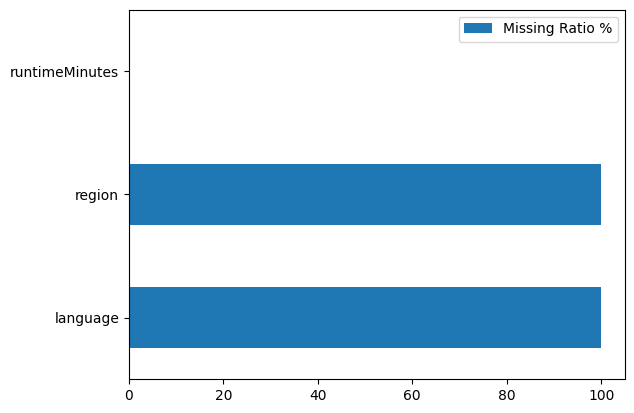

In [50]:
# Frequency of nulls by column
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

plot_nas(imdb_df)

In [51]:
# Impute non-null values
# runtimeMinutes as 2 null values
median = imdb_df.runtimeMinutes.median()

print(median)

imdb_df['runtimeMinutes'].fillna(median, inplace=True)

108.0


In [52]:
# Drop variables with frequent missing values
imdb_df.drop(columns=['region', 'language'], inplace=True)

# Drop variables no longer needed
imdb_df.drop(columns=['isOriginalTitle', 'isAdult', 'titleId', 'titleType', 'tconst', 'title'], inplace=True)

#### Feature Engineer
Ideas:
* Create Buckets for Continuous Variables
    * averageRating
        * Top250 flag
    * runtimeMinutes
    * numVotes
    * startYear
* Split genre into separate columns
    * .split with ','
* Create label of language using originalTitle and assiging a language
    * find NLP package...

In [53]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5331 entries, 0 to 5332
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averageRating   5331 non-null   float64
 1   numVotes        5331 non-null   int64  
 2   primaryTitle    5331 non-null   object 
 3   originalTitle   5331 non-null   object 
 4   startYear       5331 non-null   Int64  
 5   runtimeMinutes  5331 non-null   object 
 6   genres          5331 non-null   object 
dtypes: Int64(1), float64(1), int64(1), object(4)
memory usage: 338.4+ KB


In [66]:
# Label foreign films
# originalTitle is the original title, in the original language

# Specifying the language for detection
print(detect("Gisaengchung")) # Korean aka Parasite
print(detect("Cidade de Deus")) # Portuguese aka City of God
print(detect("La vita è bella")) # Italian aka Life is Beautiful

de
pt
it


In [70]:
# Apply language detect function to all rows

def detect_function(x):
    try:
        result = detect(x)
    except LangDetectException as e:
        result = str(e)
    return result


imdb_df['language'] = imdb_df['originalTitle'].apply(detect_function)

imdb_df['is_english'] = imdb_df['language']=='en'

# print(imdb_df.language.value_counts())
print(imdb_df.is_english.value_counts())

language
en                      2883
de                       403
tl                       151
fr                       148
nl                       146
id                       144
it                       132
so                       100
es                        94
af                        92
no                        87
ro                        84
cy                        83
da                        80
sw                        77
sv                        68
fi                        64
et                        64
ca                        60
pt                        59
pl                        55
tr                        51
lt                        42
hr                        33
sl                        32
No features in text.      20
sq                        19
vi                        19
sk                        17
hu                        11
cs                        10
lv                         3
Name: count, dtype: int64
is_english
True     2883
False    244

In [193]:
# Split genre into separate columns
imdb_df[['genre1', 'genre2', 'genre3']] = imdb_df['genres'].str.split(',', expand=True)

imdb_df[['genres', 'genre1', 'genre2', 'genre3']].head()

,genres,genre1,genre2,genre3
345,Drama,Drama,None,None
4243,"Comedy,Documentary",Comedy,Documentary,None
2155,"Action,Crime,Drama",Action,Crime,Drama
4816,"Crime,Mystery,Thriller",Crime,Mystery,Thriller
926,"Action,Adventure,Drama",Action,Adventure,Drama


In [194]:
# Convert runtimeMinutes to number
imdb_df['runtimeMinutes'] = pd.to_numeric(imdb_df['runtimeMinutes'])

imdb_df['runtimeMinutes'].describe()

count    5331.000000
mean      111.739073
std        20.840951
min        46.000000
25%        97.000000
50%       108.000000
75%       122.000000
max       321.000000
Name: runtimeMinutes, dtype: float64

In [81]:
# Create Buckets for Continuous Variables: averageRating, Top250 flag (?), runtimeMinutes, numVotes, startYear
bins = [0, 90, 120, 150, 180, 350]
labels=['short', 'shortish', 'average', 'longish', 'long']

imdb_df['runtimeMinutesBucket'] = pd.cut(imdb_df['runtimeMinutes'], bins, labels=labels)

imdb_df.head()

,averageRating,numVotes,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,language,is_english,genre1,genre2,genre3,runtimeMinutesBucket
345,9.3,2829254,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,en,True,Drama,None,None,average
4243,9.1,46971,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",ca,False,Comedy,Documentary,None,average
2155,9.0,2810661,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",en,True,Action,Crime,Drama,longish
4816,9.0,29246,Mirror Game,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",so,False,Crime,Mystery,Thriller,average
926,9.0,1937265,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",en,True,Action,Adventure,Drama,long


In [82]:
bins = [0, 4.082550e+04, 7.324600e+04, 1.584720e+05, 3e+06]
labels=['few', 'some', 'bunch', 'tons']

imdb_df['numVotesBucket'] = pd.cut(imdb_df['numVotes'], bins, labels=labels)

imdb_df.head()

,averageRating,numVotes,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,language,is_english,genre1,genre2,genre3,runtimeMinutesBucket,numVotesBucket
345,9.3,2829254,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,en,True,Drama,None,None,average,tons
4243,9.1,46971,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",ca,False,Comedy,Documentary,None,average,some
2155,9.0,2810661,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",en,True,Action,Crime,Drama,longish,tons
4816,9.0,29246,Mirror Game,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",so,False,Crime,Mystery,Thriller,average,few
926,9.0,1937265,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",en,True,Action,Adventure,Drama,long,tons


In [83]:
bins = [0, 2000, 2010, 2020, 2023]
labels=['1990s', '2000s', '2010s', 'Recent']

imdb_df['startYearBucket'] = pd.cut(imdb_df['startYear'], bins, labels=labels)

imdb_df.head()

,averageRating,numVotes,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,language,is_english,genre1,genre2,genre3,runtimeMinutesBucket,numVotesBucket,startYearBucket
345,9.3,2829254,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,en,True,Drama,None,None,average,tons,1990s
4243,9.1,46971,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",ca,False,Comedy,Documentary,None,average,some,2010s
2155,9.0,2810661,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",en,True,Action,Crime,Drama,longish,tons,2000s
4816,9.0,29246,Mirror Game,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",so,False,Crime,Mystery,Thriller,average,few,2010s
926,9.0,1937265,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",en,True,Action,Adventure,Drama,long,tons,2000s


In [86]:
bins = [0, 6.1, 6.7, 7.3, 7.7, 8.4, 10.0]
labels=['Trash', 'Bad', 'Doable', 'Good', 'Classic', 'All-Timer']

imdb_df['averageRatingBucket'] = pd.cut(imdb_df['averageRating'], bins, labels=labels)

imdb_df.head()

,averageRating,numVotes,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,language,is_english,genre1,genre2,genre3,runtimeMinutesBucket,numVotesBucket,startYearBucket,averageRatingBucket
345,9.3,2829254,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,en,True,Drama,None,None,average,tons,1990s,All-Time
4243,9.1,46971,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",ca,False,Comedy,Documentary,None,average,some,2010s,All-Time
2155,9.0,2810661,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",en,True,Action,Crime,Drama,longish,tons,2000s,All-Time
4816,9.0,29246,Mirror Game,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",so,False,Crime,Mystery,Thriller,average,few,2010s,All-Time
926,9.0,1937265,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",en,True,Action,Adventure,Drama,long,tons,2000s,All-Time


In [91]:
imdb_df.sort_values('averageRating', ascending=False, inplace=True)

imdb_df.head(10)

,averageRating,numVotes,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,language,is_english,genre1,genre2,genre3,runtimeMinutesBucket,numVotesBucket,startYearBucket,averageRatingBucket
345,9.3,2829254,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,en,True,Drama,None,None,average,tons,1990s,All-Time
4243,9.1,46971,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",ca,False,Comedy,Documentary,None,average,some,2010s,All-Time
2155,9.0,2810661,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",en,True,Action,Crime,Drama,longish,tons,2000s,All-Time
4816,9.0,29246,Mirror Game,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",so,False,Crime,Mystery,Thriller,average,few,2010s,All-Time
926,9.0,1937265,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",en,True,Action,Adventure,Drama,long,tons,2000s,All-Time
254,9.0,1421732,Schindler's List,Schindler's List,1993,195.0,"Biography,Drama,History",de,False,Biography,Drama,History,long,tons,1990s,All-Time
334,8.9,2169347,Pulp Fiction,Pulp Fiction,1994,154.0,"Crime,Drama",en,True,Crime,Drama,None,longish,tons,1990s,All-Time
2969,8.9,34042,David Attenborough: A Life on Our Planet,David Attenborough: A Life on Our Planet,2020,83.0,"Biography,Documentary",en,True,Biography,Documentary,None,short,few,2010s,All-Time
5100,8.8,37713,777 Charlie,777 Charlie,2022,164.0,"Adventure,Comedy,Drama",nl,False,Adventure,Comedy,Drama,longish,few,Recent,All-Time
723,8.8,1964110,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,"Action,Adventure,Drama",en,True,Action,Adventure,Drama,longish,tons,2000s,All-Time


#### Univariate Analysis

In [195]:
counts = imdb_df['language'].value_counts()
count_percentage = imdb_df['language'].value_counts(1)*100
counts_df = pd.DataFrame({'language':counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
display(counts_df)

,language,Counts,Percent
0,en,2883,54.08
1,de,403,7.56
2,tl,151,2.83
3,fr,148,2.78
4,nl,146,2.74
5,id,144,2.70
6,it,132,2.48
7,so,100,1.88
8,es,94,1.76
9,af,92,1.73


In [196]:
counts = imdb_df['genres'].value_counts()
count_percentage = imdb_df['genres'].value_counts(1)*100
counts_df = pd.DataFrame({'genres':counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
print('unique genres values', imdb_df['genres'].nunique())
print('Top 10 genres')
display(counts_df.head(10))

unique genres values 340
Top 10 genres


,genres,Counts,Percent
0,"Comedy,Drama,Romance",237,4.45
1,"Action,Crime,Drama",168,3.15
2,Drama,165,3.10
3,"Comedy,Romance",153,2.87
4,"Adventure,Animation,Comedy",153,2.87
5,"Comedy,Drama",148,2.78
6,Comedy,137,2.57
7,"Drama,Romance",136,2.55
8,"Action,Adventure,Comedy",122,2.29
9,"Action,Comedy,Crime",119,2.23


count    5331.000000
mean        6.605215
std         0.971492
min         1.000000
25%         6.100000
50%         6.700000
75%         7.300000
max         9.300000
Name: averageRating, dtype: float64


<Axes: >

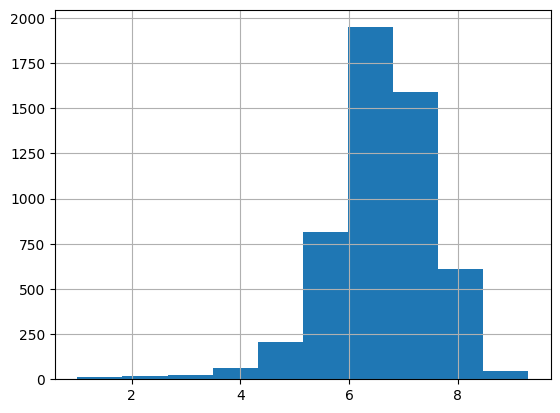

In [104]:
print(imdb_df['averageRating'].describe())
imdb_df['averageRating'].hist(bins=10)

count    5.331000e+03
mean     1.456282e+05
std      2.086094e+05
min      2.500700e+04
25%      4.082550e+04
50%      7.324600e+04
75%      1.584720e+05
max      2.829254e+06
Name: numVotes, dtype: float64


<Axes: >

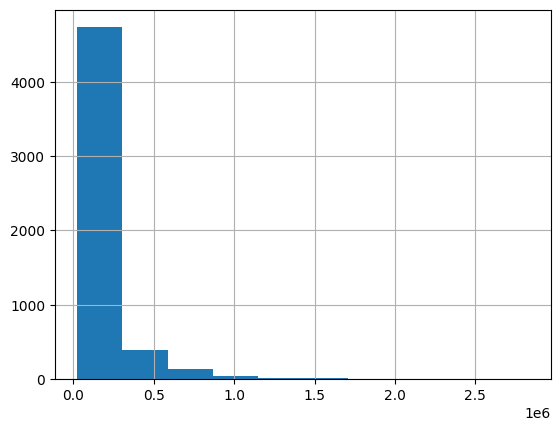

In [105]:
print(imdb_df['numVotes'].describe())
imdb_df['numVotes'].hist(bins=10)

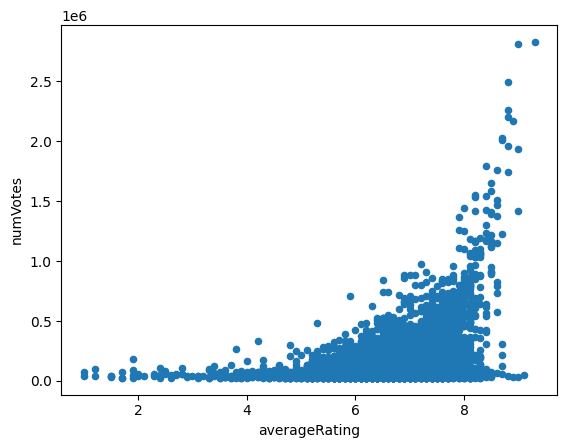

In [107]:
ax = imdb_df.plot.scatter(x='averageRating',y='numVotes')

### Recommendation Model

In [87]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5331 entries, 345 to 5077
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   averageRating         5331 non-null   float64 
 1   numVotes              5331 non-null   int64   
 2   primaryTitle          5331 non-null   object  
 3   originalTitle         5331 non-null   object  
 4   startYear             5331 non-null   Int64   
 5   runtimeMinutes        5331 non-null   float64 
 6   genres                5331 non-null   object  
 7   language              5331 non-null   object  
 8   is_english            5331 non-null   bool    
 9   genre1                5331 non-null   object  
 10  genre2                4977 non-null   object  
 11  genre3                3843 non-null   object  
 12  runtimeMinutesBucket  5331 non-null   category
 13  numVotesBucket        5331 non-null   category
 14  startYearBucket       5331 non-null   category
 15  average

##### Popularity Based
Akin to Netflix and how they do "Top 10 Most Popular" banner

In [121]:
def recommend_most_popular(col: str, col_value: str, top_n=5):
    imdb_df['ranking'] = np.where((imdb_df['genre1'].str.contains(col_value, case=False, regex=True)), 1,   #when... then
        np.where((imdb_df['genre2'].str.contains(col_value, case=False, regex=True)), 2,  #when... then
            np.where((imdb_df['genre3'].str.contains(col_value, case=False, regex=True)), 3,  #when... then
                np.nan))) #else
    return imdb_df[imdb_df[col].str.contains(col_value, case=False, regex=True)].sort_values(by=['averageRating', 'ranking', 'numVotes'], ascending = [False, True, False]).head(top_n)[['primaryTitle', col, 'averageRating']]

In [125]:
recommend_most_popular('genres', 'action')

,primaryTitle,genres,averageRating
2155,The Dark Knight,"Action,Crime,Drama",9.0
926,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
3256,Inception,"Action,Adventure,Sci-Fi",8.8
723,The Lord of the Rings: The Fellowship of the Ring,"Action,Adventure,Drama",8.8
927,The Lord of the Rings: The Two Towers,"Action,Adventure,Drama",8.8


#### Content-Based
Inspiration from: https://medium.com/@GauthamK20/content-based-recommendations-a-technical-deep-dive-5821336d8dd1

In [128]:
# Content-Based Packages
from scipy import sparse
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [173]:
class ContentRecommendation():
    def __init__(self):
        self.vectorizer = None
        self.name_vectorizer = None
        self.common_vectorizer = None

    def initialize(self, product_count):
        # Boost the vector value of certain attributes
        self.boost = {
            'genres': 30
        }

        def handle_nans(data):
            if data == 0 or data is np.nan:
                return ''
            else:
                return data
        tfidf_params = {
            'decode_error': 'ignore',
            'min_df': 2,
            'stop_words': 'english',
            'norm': None,
            'analyzer': 'word',
            'preprocessor': handle_nans,
        }
        # attribute name has a higher n-gram range
        name_tfidf_params = {
            'ngram_range': (1, 3),
            'max_features': 5 * product_count
        }
        name_tfidf_params.update(tfidf_params)
        common_tfidf_params = {
            'ngram_range': (1, 2),
            'max_features': min(2000, product_count)
        }
        common_tfidf_params.update(tfidf_params)
        self.name_vectorizer = TfidfVectorizer(**name_tfidf_params)
        self.common_vectorizer = TfidfVectorizer(**common_tfidf_params)

    def process_column(self, col):
        example_val_index = col.first_valid_index()
        if not example_val_index:
            return pd.Series(np.empty(col.shape[0]), index=col.index)
        column_type = type(col[example_val_index])

        def process_list(l):
            if type(l) is list:
                list_item = ' '.join(list(filter(lambda x: type(x) in [str] and len(x) > 0, l)))
                if len(list_item.strip()) > 0:
                    return list_item
            return np.nan

        def normalize_values(col):
            col = col.astype(float)
            min_value = col.min()
            max_value = col.max()
            normalized_values = ((col - min_value) / (max_value - min_value)).fillna(0)
            if col.name in self.boost:
                normalized_values = normalized_values * self.boost[col.name]
            return normalized_values

        numerics = [np.int16, np.int32, np.int64, np.float16, np.float32, np.float64, int, float]
        if column_type in numerics:
            processed_col = normalize_values(col)
        elif column_type is list:
            processed_col = col.apply(process_list)
        elif column_type in [str]:
            processed_col = col
        else:
            processed_col = pd.Series(np.empty(col.shape[0]), index=col.index)
        return processed_col

    def get_tf_idf_vector(self, col):
        try:
            col_values = list(col.fillna('').values.astype(str))
            if col.name == 'name':
                tfidf_col = self.name_vectorizer.fit_transform(col_values)
            else:
                tfidf_col = self.common_vectorizer.fit_transform(col_values)
            if col.name in self.boost:
                tfidf_col = tfidf_col * self.boost[col.name]
            return tfidf_col
        except Exception as e:
            return None

    def process_columns(self, df):
        df.set_index('originalTitle', inplace=True)
        # deal with duplicate keys
        df = df[~df.index.duplicated(keep='first')]
        print(df.columns)
        pdf = df.apply(self.process_column, axis=0)
        # drop columns that doesn't have a single value
        if len(pdf.shape) > 1:
            pdf.dropna(axis=1, how='all', inplace=True)
        return pdf

    def get_sparse_data(self, df):
        sparse_features = [self.get_tf_idf_vector(df[column]) for column in df.select_dtypes(exclude='number').columns]
        sparse_numeric_values = sparse.csr_matrix(np.nan_to_num(df[df.columns[df.dtypes != 'object']].values))
        sparse_features.append(sparse_numeric_values)
        sparse_features = [feature for feature in sparse_features if feature is not None]
        sparse_data = hstack(tuple(sparse_features))
        sparse_data.eliminate_zeros()
        return sparse_data

    def get_cosine_similarity(self, sparse_data_1, sparse_data_2):
        result = cosine_similarity(sparse_data_1, Y=sparse_data_2, dense_output=False)
        return result

    def get_related_products(self, cs_result, row_index=0, col_index=0, mfr_index=None):
        related_products = cs_result.tocoo(copy=False)
        rdf = pd.DataFrame({
            'index': related_products.row + row_index,
            'col': related_products.col + col_index,
            'data': related_products.data
        })
        return self.get_top_10_products(rdf)

    def get_top_10_products(self, all_scores_df):
        max_items = all_scores_df.groupby('index').count().col.max()
        item_count = min(10, max_items - 1)
        top_10_df = all_scores_df.sort_values('data', ascending=False).groupby('index').head(item_count)
        return top_10_df

    def generate_related_products(self, df):
        if df.shape[0] > 0:
            processed_df = self.process_columns(df)
            if len(processed_df.shape) == 1:
                print('ERROR No features found')
                return None, None
            sparse_df = self.get_sparse_data(processed_df)
            # if there are more than products_count_limit, process in batches to avoid 
            # memory error in computing cosine similarity
            products_count_limit = 2000
            if sparse_df.shape[0] > products_count_limit:
                split_limits = np.arange(0, sparse_df.shape[0], products_count_limit)
                if split_limits[-1] != sparse_df.shape[0]:
                    split_limits = np.append(split_limits, sparse_df.shape[0])
                print(split_limits)
                sparse_df = sparse_df.tocsr()
                splits = [sparse_df[start:end, :] for start, end in zip(split_limits[:-1], split_limits[1:])]
                row_index = 0
                col_index = 0
                df_result = pd.DataFrame()
                for i, s1 in enumerate(splits[:]):
                    col_index = 0
                    for j, s2 in enumerate(splits[:]):
                        cs = self.get_cosine_similarity(s1, s2)
                        rp = self.get_related_products(cs, row_index, col_index, df.index)
                        df_result = pd.concat([df_result, rp], ignore_index=True)
                        col_index += splits[j].shape[0]
                    row_index += splits[i].shape[0]
                df_result_top_10 = self.get_top_10_products(df_result)
                print('result_df' + str(df_result_top_10.shape))
            else:
                sparse_df.tocsr()
                cs = self.get_cosine_similarity(sparse_df, sparse_df)
                df_result = self.get_related_products(cs, 0, 0, df.index)
            return df_result, df.index, sparse_df
        return None, None

    def populate_related_products(self, result, mfr_index):
        results = {}
        for i, group in result.groupby('index'): #removed [] around 'index'
            if (i % 1000) == 0 and i > 0:
                print(str(i) + ' products updated')
            max_vals = group.sort_values('data', ascending=False).head(10)
            mfr_code = mfr_index[i]
            if mfr_code is None:
                continue
            mfr_code = str(mfr_code)
            max_vals['col'] = max_vals['col'].apply(lambda x: mfr_index[int(x)])
            related_mfrs = {mfr: score for mfr, score in zip(list(max_vals['col'])[1:], list(max_vals['data'])[1:])}
            if mfr_code in related_mfrs:
                del related_mfrs[mfr_code]
            related_mfrs = {pid: score for pid, score in related_mfrs.items()}
            results[mfr_code] = related_mfrs
        return results

    def run(self, products_df):
        self.initialize(products_df.shape[0])
        results_df, df_index, sparse_df = self.generate_related_products(products_df)
        if results_df is not None:
            related_products = self.populate_related_products(results_df, df_index)
            return related_products, sparse_df
        return None

In [174]:
imdb_df.dtypes

averageRating            float64
numVotes                   int64
primaryTitle              object
originalTitle             object
startYear                  Int64
runtimeMinutes           float64
genres                    object
language                  object
is_english                  bool
genre1                    object
genre2                    object
genre3                    object
runtimeMinutesBucket    category
numVotesBucket          category
startYearBucket         category
averageRatingBucket     category
ranking                  float64
dtype: object

In [175]:
_cr = ContentRecommendation()

##### Subset Data for Testing

In [176]:
test_df = imdb_df[['originalTitle', 'primaryTitle', 'averageRating', 'numVotes', 'startYear', 'runtimeMinutes', 'genres', 'language']].copy()

May need to convert category types of engineered variables to object in order for processing to work.

In [177]:
related_products, sparse_df = _cr.run(test_df.copy())

Index(['primaryTitle', 'averageRating', 'numVotes', 'startYear',
       'runtimeMinutes', 'genres', 'language'],
      dtype='object')
[   0 2000 4000 5273]
result_df(52730, 3)
1000 products updated
2000 products updated
3000 products updated
4000 products updated
5000 products updated


##### Sample Input

In [178]:
imdb_df.sort_values('averageRating', ascending=False, inplace=True)

imdb_df.head(50)

,averageRating,numVotes,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,language,is_english,genre1,genre2,genre3,runtimeMinutesBucket,numVotesBucket,startYearBucket,averageRatingBucket,ranking
345,9.3,2829254,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,en,True,Drama,None,None,average,tons,1990s,All-Time,NaN
4243,9.1,46971,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",ca,False,Comedy,Documentary,None,average,some,2010s,All-Time,NaN
2155,9.0,2810661,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",en,True,Action,Crime,Drama,longish,tons,2000s,All-Time,1.0
4816,9.0,29246,Mirror Game,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",so,False,Crime,Mystery,Thriller,average,few,2010s,All-Time,NaN
926,9.0,1937265,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",en,True,Action,Adventure,Drama,long,tons,2000s,All-Time,1.0
254,9.0,1421732,Schindler's List,Schindler's List,1993,195.0,"Biography,Drama,History",de,False,Biography,Drama,History,long,tons,1990s,All-Time,NaN
334,8.9,2169347,Pulp Fiction,Pulp Fiction,1994,154.0,"Crime,Drama",en,True,Crime,Drama,None,longish,tons,1990s,All-Time,NaN
2969,8.9,34042,David Attenborough: A Life on Our Planet,David Attenborough: A Life on Our Planet,2020,83.0,"Biography,Documentary",en,True,Biography,Documentary,None,short,few,2010s,All-Time,NaN
3256,8.8,2494942,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",en,True,Action,Adventure,Sci-Fi,average,tons,2000s,All-Time,1.0
927,8.8,1746734,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,2002,179.0,"Action,Adventure,Drama",en,True,Action,Adventure,Drama,longish,tons,2000s,All-Time,1.0


In [182]:
# Sample input, rate some movies that you like
user_positive_movies = {
    'Inception': 9,
    'The Matrix': 10,
    'Se7en': 9
}

#### Recommendations Based on User Ratings Input

In [198]:
def get_user_recommendations(user_actions, n=10, foriegn_only=False):
    user_movie_map = {}
    for product_id, user_score in user_actions.items():
        for related_id, related_score in related_products[product_id].items():
            user_movie_map[related_id] = user_movie_map.get(related_id, 0) + (related_score * user_score)
    for product_id in user_actions:
        if product_id in user_movie_map:
            del user_movie_map[product_id]
            
    user_recommendations = sorted(user_movie_map.items(), key=lambda x: x[1], reverse=True)

    if foriegn_only is True:
        ur = user_recommendations[user_recommendations['language']=='en']
        return ur[:min(n, len(ur))]
    else:
        return user_recommendations[:min(n, len(user_recommendations))]

In [200]:
user_recommendations = get_user_recommendations(user_positive_movies, 10, False)

print(user_recommendations)

('The Guest', 9.999973696930462)
[('Fracture', 9.999977979754396), ('The Guest', 9.999973696930462), ("Cirque du Freak: The Vampire's Assistant", 9.999927790827794), ('Snatched', 9.98974123355502), ('Slumdog Millionaire', 9.98569858584791), ('Gangster Squad', 9.985043562579506), ('Kisi Ka Bhai Kisi Ki Jaan', 9.984972842622966), ('Terminator 2: Judgment Day', 9.982700049375326), ('Thir13en Ghosts', 9.982186431948868), ('Im Westen nichts Neues', 8.999959494763113)]


Note: Ideal recommendation system of collaborative filtering is not possible due to IMDb not containing user-level data. All the data is aggregated to a movie. Hence, the best system for this particular situation is content based.

In [ ]:
s